# Task 1

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from sklearn.datasets import load_boston
boston=load_boston()
data=boston.data
feature_names=boston.feature_names
target=boston.target
X=pd.DataFrame(data,columns=feature_names)
y=pd.DataFrame(target,columns=['price'])

In [41]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(x_test)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=feature_names)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=feature_names)

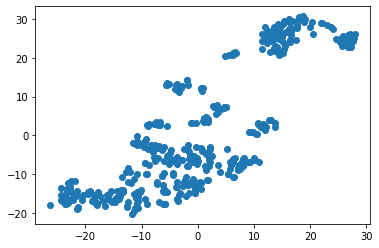

In [44]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne=tsne.fit_transform(x_train_scaled)
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1])

# Task2

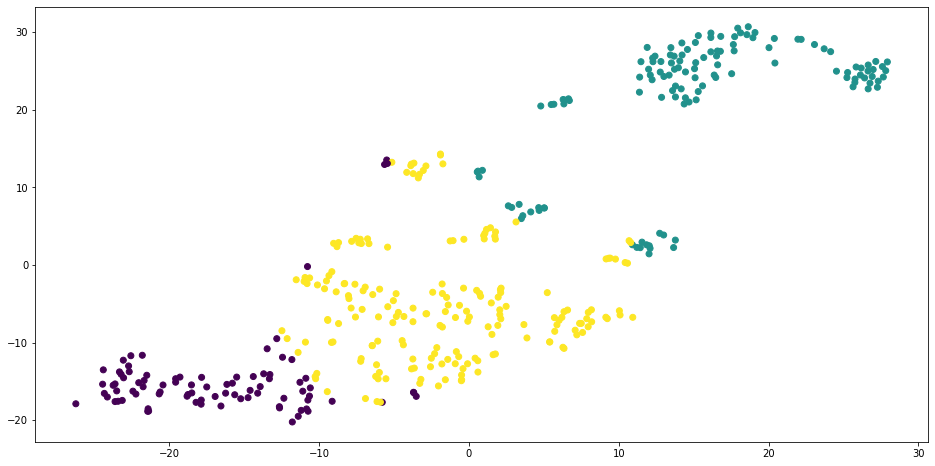

In [55]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,max_iter=100,random_state=42)
labels_train=kmeans.fit_predict(x_train_scaled)
plt.figure(figsize=(16,8))
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1],c=labels_train)

In [57]:
CRIM_mean_0=X_train.loc[labels_train==0, 'CRIM'].mean()
CRIM_mean_1=X_train.loc[labels_train==1, 'CRIM'].mean()
CRIM_mean_2=X_train.loc[labels_train==2, 'CRIM'].mean()
[CRIM_mean_0,CRIM_mean_1,CRIM_mean_2]

[0.07356558139534886, 10.797028425196853, 0.42166020942408367]

In [62]:
price_mean_0=y_train.loc[labels_train==0, 'price'].mean()
price_mean_1=y_train.loc[labels_train==1, 'price'].mean()
price_mean_2=y_train.loc[labels_train==2, 'price'].mean()
[price_mean_0,price_mean_1,price_mean_2]

[27.788372093023252, 16.165354330708666, 24.958115183246072]

# Task3

In [63]:
labels_test=kmeans.predict(x_test_scaled)

In [65]:
CRIM_mean_0=x_test.loc[labels_test==0, 'CRIM'].mean()
CRIM_mean_1=x_test.loc[labels_test==1, 'CRIM'].mean()
CRIM_mean_2=x_test.loc[labels_test==2, 'CRIM'].mean()
[CRIM_mean_0,CRIM_mean_1,CRIM_mean_2]

[0.07985181818181818, 10.165531142857143, 0.2845831111111111]

In [66]:
price_mean_0=y_test.loc[labels_test==0, 'price'].mean()
price_mean_1=y_test.loc[labels_test==1, 'price'].mean()
price_mean_2=y_test.loc[labels_test==2, 'price'].mean()
[price_mean_0,price_mean_1,price_mean_2]

[28.413636363636364, 16.437142857142856, 22.031111111111112]